### Principal Component Analysis (PCA) - Student Dataset
Joshua Rosell

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('data.csv', sep=';')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Renaming the columns.

In [4]:
dataset.columns = ['marital_status', 'app_mode', 'app_order', 'course', 'attendance', 'prev_qual', 'prev_grade', 'nationality', 'mother_qual', 'father_qual', 
                   'mother_occup', 'father_occup', 'admission_grade', 'displaced', 'special_needs', 'debtor', 'tuition', 'gender', 'scholarship', 'age', 'international',
                    '1stsem_credited', '1stsem_enrolled', '1stsem_eval', '1stsem_approved', '1stsem_grade', '1stsem_WO_eval', '2ndsem_credited',
                     '2ndsem_enrolled', '2ndsem_eval', '2ndsem_approved', '2ndsem_grade', '2ndsem_WO_eval', 'unemployment', 'inflation', 'GDP', 'target' ]

Checking a few rows of the dataset.

In [5]:
dataset.head()

,marital_status,app_mode,app_order,course,attendance,prev_qual,prev_grade,nationality,mother_qual,father_qual,...,2ndsem_credited,2ndsem_enrolled,2ndsem_eval,2ndsem_approved,2ndsem_grade,2ndsem_WO_eval,unemployment,inflation,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Encoding the target variable.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Extract the class label from the last part of each string
y_classes = np.array([label.split(';')[-1] for label in y])

# Create and fit a label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_classes)

# Print the classes and their encodings
print(f"Original classes: {le.classes_}")
print(f"Encoded classes: {dict(zip(le.classes_, range(len(le.classes_))))}")
print(f"Class distribution: {np.bincount(y_encoded)}")

Original classes: ['Dropout' 'Enrolled' 'Graduate']
Encoded classes: {np.str_('Dropout'): 0, np.str_('Enrolled'): 1, np.str_('Graduate'): 2}
Class distribution: [1421  794 2209]


Checking some important information.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   marital_status   4424 non-null   int64  
 1   app_mode         4424 non-null   int64  
 2   app_order        4424 non-null   int64  
 3   course           4424 non-null   int64  
 4   attendance       4424 non-null   int64  
 5   prev_qual        4424 non-null   int64  
 6   prev_grade       4424 non-null   float64
 7   nationality      4424 non-null   int64  
 8   mother_qual      4424 non-null   int64  
 9   father_qual      4424 non-null   int64  
 10  mother_occup     4424 non-null   int64  
 11  father_occup     4424 non-null   int64  
 12  admission_grade  4424 non-null   float64
 13  displaced        4424 non-null   int64  
 14  special_needs    4424 non-null   int64  
 15  debtor           4424 non-null   int64  
 16  tuition          4424 non-null   int64  
 17  gender        

Identifying relevant features.

In [8]:
X_relevant = X[:, [6, 12, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_relevant, y_encoded, test_size = 0.2, random_state = 0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Determining the number of components by plotting cumulative percent variance or CPV.

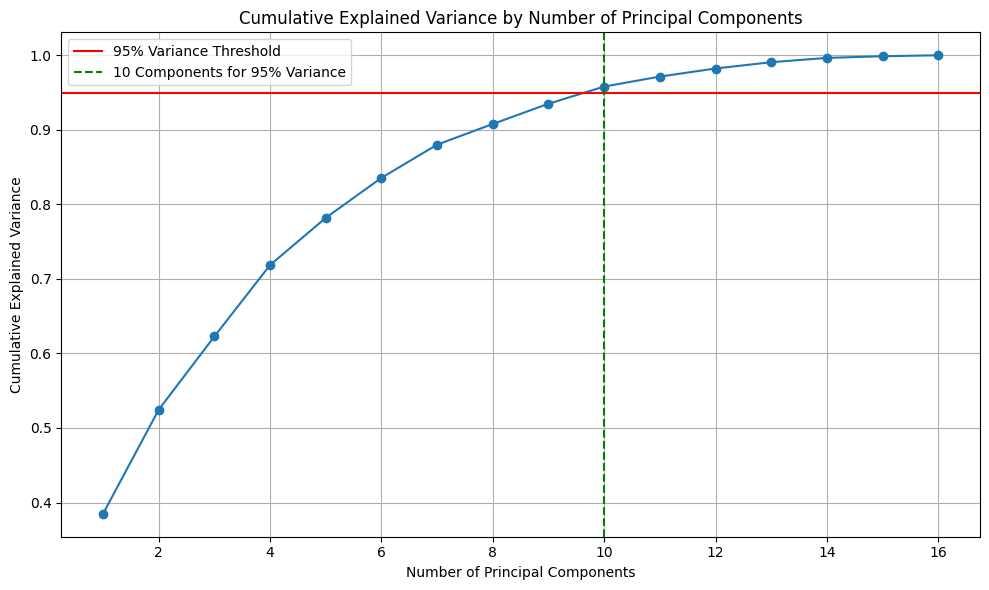

Number of components for 80% variance: 6
Number of components for 90% variance: 8
Number of components for 95% variance: 10
Number of components for 99% variance: 13


In [11]:
from sklearn.decomposition import PCA

# Apply PCA with all components (same as X_relevant's feature count)
pca_full = PCA()
X_relevant_scaled = sc.transform(X_relevant)  # Use the standardized data
pca_full.fit(X_relevant_scaled)

# Get the explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)

# Add a horizontal line at 0.95 to show 95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')

# Add a vertical line at the number of components needed for 95% variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
plt.axvline(x=n_components_95, color='g', linestyle='--', 
            label=f'{n_components_95} Components for 95% Variance')

plt.legend()
plt.tight_layout()
plt.show()

# Print the number of components needed for various variance thresholds
print(f"Number of components for 80% variance: {np.where(cumulative_variance >= 0.80)[0][0] + 1}")
print(f"Number of components for 90% variance: {np.where(cumulative_variance >= 0.90)[0][0] + 1}")
print(f"Number of components for 95% variance: {np.where(cumulative_variance >= 0.95)[0][0] + 1}")
print(f"Number of components for 99% variance: {np.where(cumulative_variance >= 0.99)[0][0] + 1}")

## Applying PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[209  24  51]
 [ 40  48  63]
 [ 24  12 414]]


0.7581920903954802